## Credit Card Financial Dataset - Exploratory and Descriptive Analysis
In this notebook, we perform an extensive exploratory and descriptive analysis of a credit card financial dataset, with the objective of uncovering behavioral and demographic patterns that influence credit usage, delinquency, and customer satisfaction.

This analytical phase is critical for understanding the underlying structure of the data, validating data quality, and generating insights that inform downstream decision-making and modeling strategies. Through a combination of descriptive statistics and interactive visualizations, we analyze customer profiles, credit card usage behaviors, financial metrics, and satisfaction levels.

The analysis covers key topics such as customer distribution by marital status, credit card activation trends, average interest earned across card types, delinquency by state, and customer breakdowns by `job`, `gender`, and `satisfaction score`. Each visualization is tailored to enhance interpretability and support business or operational decision-making.

We begin by importing the necessary Python libraries:

- `pandas`: for data manipulation, transformation, and tabular exploration.

- `numpy`: for numerical operations and efficient array handling.

- `os`: to manage file paths and export analysis outputs.

- `plotly.express`: for building clean, publication-ready interactive charts.

warnings: to suppress unnecessary runtime warnings for cleaner outputs.

This notebook lays the foundation for deeper statistical modeling and dashboard reporting by providing a clear and structured view of the data’s characteristics and trends.

In [1]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.

In [57]:
#Get working directory
current_dir = os.getcwd()
#go one directory up to root directory
project_root_dir = os.path.dirname(current_dir)
#Define path to data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
#Define path to results folder
docs_dir = os.path.join(project_root_dir, 'docs')

#Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

## Loading the Cleaned Dataset
We load the cleaned version of the Credit Card Financial Dataset from the data/processed/ directory into a Pandas DataFrame. This dataset contains customer-level information including demographic attributes, financial activity, credit usage behavior, and satisfaction metrics.

The first ten records are displayed using the `head(5)` function to provide a preview of key columns such as `Client_Num`, `Card_Category`, `Annual_Fees`, `Credit_Limit`, `Total_Trans_Amt`, `Cust_Satisfaction_Score`.... This initial view helps confirm successful loading and gives a quick look at the structure and content of the cleaned dataset.

In [5]:
merged_data_filename = os.path.join(processed_dir, "Credit_Card_Financial.csv")
merged_df = pd.read_csv(merged_data_filename)
merged_df.head(5)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Education_Level,Marital_Status,state_cd,Car_Owner,House_Owner,Personal_loan,Customer_Job,Income,Cust_Satisfaction_Score,Month
0,708082083,blue,200,0,87,2023-01-01,week-1,q1,2023,3544.0,...,uneducated,single,Florida,no,yes,no,businessman,202326,3,January
1,708083283,blue,445,1,108,2023-01-01,week-1,q1,2023,3421.0,...,unknown,married,New Jersey,no,no,no,selfemployeed,5225,2,January
2,708084558,blue,140,0,106,2023-01-01,week-1,q1,2023,8258.0,...,unknown,married,New Jersey,yes,no,no,selfemployeed,14235,2,January
3,708085458,blue,250,1,150,2023-01-01,week-1,q1,2023,1438.3,...,uneducated,single,New York,no,no,no,blue-collar,45683,1,January
4,708086958,blue,320,1,106,2023-01-01,week-1,q1,2023,3128.0,...,graduate,single,Texas,yes,yes,no,businessman,59279,1,January


In [7]:
merged_df.columns

Index(['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc',
       'Customer_Age', 'Gender', 'Dependent_Count', 'Education_Level',
       'Marital_Status', 'state_cd', 'Car_Owner', 'House_Owner',
       'Personal_loan', 'Customer_Job', 'Income', 'Cust_Satisfaction_Score',
       'Month'],
      dtype='object')

In [9]:
merged_df.shape

(10108, 31)

In [11]:
merged_df.info

<bound method DataFrame.info of        Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0       708082083          blue          200                   0   
1       708083283          blue          445                   1   
2       708084558          blue          140                   0   
3       708085458          blue          250                   1   
4       708086958          blue          320                   1   
...           ...           ...          ...                 ...   
10103   827695683          blue          340                   1   
10104   827703258          blue          395                   1   
10105   827712108          blue          125                   1   
10106   827888433          blue          410                   0   
10107   827890758          blue          100                   0   

       Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  \
0                     87      2023-01-01   week-1  q1          2023   
1        

## Summary Statistics: Numerical Variables

In [13]:
merged_df.describe()

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Dependent_Count,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,291.849525,0.574693,96.254056,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,775.957878,0.060744,2.345370,56976.101998,3.189256
std,3.673623e+07,118.339384,0.494414,25.768677,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,723.952320,0.238872,1.299486,46183.718233,1.263101
min,7.080821e+08,95.000000,0.000000,40.000000,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,42.140000,0.000000,0.000000,1250.000000,1.000000
25%,7.130267e+08,195.000000,0.000000,79.000000,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,326.150000,0.000000,1.000000,22635.750000,2.000000
50%,7.179037e+08,295.000000,1.000000,95.000000,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,559.985000,0.000000,2.000000,44768.500000,3.000000
75%,7.727989e+08,395.000000,1.000000,112.000000,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,962.685000,0.000000,3.000000,76392.750000,4.000000
max,8.278908e+08,500.000000,1.000000,172.000000,2023.0,34516.000000,2517.000000,18484.000000,139.000000,0.999000,4785.000000,1.000000,5.000000,239791.000000,5.000000


This summary provides a snapshot of key distribution characteristics.

We see that annual fees range from $95 to $500, with a mean of $291.85 and a median of $295. The distribution appears approximately symmetrical, centered around common fee brackets, suggesting a standardized pricing structure across products. The upper range could reflect premium services or high-tier customers.

The activation within 30 days is a binary variable, and the mean of 0.57 indicates that about 57% of customers activated their accounts promptly. This majority suggests either strong onboarding or incentives driving early engagement.

Customer acquisition costs range from $40 to $172, with an average of $96.25. While the median is close to the mean at $95, the standard deviation of $25.77 suggests moderate variation in marketing or sales strategies. The higher end may reflect targeted campaigns for premium customer segments.

All records come from the year 2023, ensuring temporal consistency and simplifying trend comparisons.

The credit limit distribution is notably right-skewed. Limits range from $1,438 to $34,516, with a mean of $8,635 and a median of $4,549. This substantial gap implies that while most customers have modest limits, a small segment enjoys significantly higher lines of credit, potentially due to higher incomes or credit scores.

Total revolving balances and utilization ratios also exhibit right-skewness. The average revolving balance is $1,162.79, and the average utilization is 27.5%, though a portion of customers reach full utilization (max = 99.9%). This pattern is typical in credit datasets, where most users maintain moderate usage, but some hover near or at the limit, signaling financial stress or high spending behavior.

Total transaction amounts average $4,404.63, with a wide spread (up to $18,484), indicating variability in spending patterns. Transaction volumes range from 10 to 139, with a median of 67, aligning with moderate monthly use and consistent card engagement.

Interest earned also reveals financial diversity. The average is $775.96, but values go up to $4,785, implying some customers are carrying balances over time, while others pay off promptly and avoid interest.

The delinquency rate is low, with only about 6% of customers having a delinquent account. This suggests relatively healthy repayment behavior in the majority of the sample.

Customers report an average of 2.35 dependents, ranging up to 5, with the most common values between 1 and 3. This distribution supports a demographic base consisting of family households.

Income is perhaps the most skewed feature. It spans from $1,250 to $239,791, with a mean of $56,976 and median near $44,768. This implies income inequality in the sample, with a small number of high earners pulling up the average. The majority earn below $76K, with a significant concentration in the lower brackets.

Finally, customer satisfaction scores range from 1 (low) to 5 (high), with an average of 3.19. This moderate central tendency suggests generally neutral-to-positive feedback, but with room for improvement. The distribution’s standard deviation of 1.26 shows variation in experience across customer segments.

### Summary Statistics: Categorical Variables

In [15]:
merged_df.describe(include='object')

,Card_Category,Week_Start_Date,Week_Num,Qtr,Use Chip,Exp Type,Customer_Age,Gender,Education_Level,Marital_Status,state_cd,Car_Owner,House_Owner,Personal_loan,Customer_Job,Month
count,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108
unique,4,52,52,4,3,6,6,2,6,3,28,2,2,2,6,12
top,blue,2023-07-02,week-27,q2,swipe,bills,46-55,Female,graduate,married,California,no,no,no,selfemployeed,April
freq,9214,195,195,2535,7101,2970,4104,5880,4134,5128,2468,6044,5390,8822,2575,975


In [17]:
merged_df['Gender'].value_counts(normalize=True)

Gender
Female    0.581717
Male      0.418283
Name: proportion, dtype: float64

In [19]:
merged_df['Card_Category'].value_counts(normalize=True)

Card_Category
blue        0.911555
silver      0.063217
gold        0.018599
platinum    0.006628
Name: proportion, dtype: float64

In [21]:
merged_df['Marital_Status'].value_counts(normalize=True)

Marital_Status
married    0.507321
single     0.419074
unknown    0.073605
Name: proportion, dtype: float64

In [23]:
merged_df['Education_Level'].value_counts(normalize=True)

Education_Level
graduate         0.408983
high school      0.198753
unknown          0.149881
uneducated       0.146715
post-graduate    0.051049
doctorate        0.044618
Name: proportion, dtype: float64

In [25]:
merged_df['Cust_Satisfaction_Score'].value_counts(normalize=True)

Cust_Satisfaction_Score
3    0.303522
4    0.207657
5    0.195489
2    0.177285
1    0.116047
Name: proportion, dtype: float64

The dataset shows that 58.17% of the customers are female, while 41.83% are male. This indicates a higher representation of female credit card holders in the data. Such a distribution could suggest that women are either more likely to use the credit card services offered by this institution or are better represented in the customer base. Understanding this gender balance is important for designing personalized financial products, marketing strategies, and improving customer satisfaction

The majority of customers—91.16%—hold a Blue card, making it the most common card category by far. Silver cards account for 6.32%, while Gold and Platinum cards represent just 1.86% and 0.66% respectively.
This distribution suggests that most customers are enrolled in entry-level or standard credit card programs. Premium cards like Gold and Platinum are significantly less common, likely due to stricter eligibility criteria or targeted offerings for high-income or high-credit-score individuals. This insight can help institutions reassess product penetration and evaluate the success of their premium card promotions.

The data shows that 50.73% of the customers are married, while 41.91% are single. A smaller portion, 7.36%, have their marital status listed as unknown.
This suggests that over half of the customer base is in committed relationships, which could influence financial behaviors such as joint spending, credit sharing, or long-term financial planning. The relatively high percentage of single individuals also indicates a significant market segment for independent financial products. The presence of unknown entries may point to missing data or customers opting not to disclose personal details.

The largest portion of customers—40.90%—are graduates, followed by 19.88% with a high school education. Notably, 14.99% of the data falls under unknown, and 14.67% of customers are uneducated. Higher education levels, such as post-graduate and doctorate, account for 5.10% and 4.46% respectively.
This indicates that the majority of the customer base has at least a college education, which could correlate with more stable income levels and credit behavior. However, the sizable unknown and uneducated segments suggest the need for inclusive financial services and possible improvement in data collection practices.

The most common satisfaction score is 3, making up 30.35% of the customers, followed by scores of 4 (20.77%) and 5 (19.55%). Lower satisfaction levels are less frequent, with 17.73% of customers rating 2, and only 11.60% giving the lowest score of 1.
This distribution shows that most customers are moderately satisfied, but there is a nearly even split between higher (4–5) and lower (1–2) satisfaction scores. The presence of significant dissatisfaction (nearly 30%) highlights opportunities for improving customer experience, while the strong presence of mid-to-high scores shows potential for customer retention if services are optimized.

###  Insights

In [27]:
average_income = merged_df["Income"].mean()
print("Average Income:", round(average_income, 2))

Average Income: 56976.1


In [29]:
total_customers = merged_df["Client_Num"].nunique()
print("Total Customers:", total_customers)

Total Customers: 10108


In [31]:
avg_credit_limit = merged_df["Credit_Limit"].mean()
print("Average Credit Limit:", round(avg_credit_limit, 2))

Average Credit Limit: 8635.64


In [33]:
avg_score = merged_df["Cust_Satisfaction_Score"].mean()
print("Average Satisfaction Score:", round(avg_score, 2))

Average Satisfaction Score: 3.19


1. Average Income: 56,976.10
This indicates that on average, customers in the dataset earn around $56,976 annually. This relatively moderate income level suggests a mostly middle-income customer base. Financial institutions can use this figure to tailor credit products and services that align with average earning capacity.

2. Total Customers: 10,108
The dataset contains information on 10,108 customers, offering a substantial sample size for analysis. This ensures a diverse representation of demographics, occupations, and behaviors, making any derived patterns or trends more reliable and insightful for business decisions.

3. Average Credit Limit: 8,635.64
On average, each customer has access to about $8,635 in credit. This reflects the institution’s credit allocation strategy and risk tolerance. Comparing this with income, the average credit limit is approximately 15% of the average annual income, suggesting a conservative credit extension policy.

4. Average Satisfaction Score: 3.19 (out of 5)
The satisfaction score indicates a moderate level of customer satisfaction, slightly above neutral. A score of 3.19 implies that while many customers are relatively content, there’s still room for improvement in service delivery, credit products, or customer support.

Add median income, median credit limit, or mode for most common card type.

In [117]:
print("Median Income:", merged_df["Income"].median())
print("Mode Card Type:", merged_df["Card_Category"].mode()[0])

Median Income: 44768.5
Mode Card Type: blue


# Summary of Recommendations

- Median income is around 44,768.5; focus marketing on middle-income customers.
- "Blue" is the most common card type; consider enhancing its features and promotions.
- Use Chi-Square tests to check relationships between card type and demographics.
- Use ANOVA or Kruskal-Wallis tests to see if income differs by card type.
- Analyze income distribution further to tailor products better.

Do men and women have different average credit limits?

In [111]:
from scipy.stats import ttest_ind

men = merged_df[merged_df['Gender'] == 'Male']['Credit_Limit']
women = merged_df[merged_df['Gender'] == 'Female']['Credit_Limit']
t_stat, p_val = ttest_ind(men, women, nan_policy='omit')
print("p-value:", p_val)

p-value: 0.0021908036479159564


# Statistical Test Summary: Gender vs Credit Limit

## T-Test Result
- **p-value:** 0.00219

## Interpretation
- Since the p-value is **less than 0.05**, there is a **statistically significant difference** in average credit limits between **male and female** customers.
- This suggests that **gender is associated with different credit limit assignments** in this dataset.

## Data-Driven Recommendations

1. **Review Gender-Based Credit Policies**
   - Investigate why males and females receive different credit limits.
   - Ensure credit evaluation processes are fair, unbiased, and compliant with financial regulations.

2. **Refine Credit Strategies**
   - If the difference is justified by other factors (e.g., income, credit score), consider building separate credit models by gender or re-evaluating feature weights in existing models.

3. **Further Statistical Analysis**
   - Explore if **income** also differs significantly by gender using another T-test.
   - Use **correlation analysis** to examine relationships between `Credit_Limit`, `Income`, `Card Type`, and other variables.
   - Consider building a **regression model** to predict `Credit_Limit` using multiple features, including gender.

## Possible Correlations
- There may be a correlation between **Gender and Credit Limit**, as well as between **Income and Credit Limit**.
- A **correlation matrix** or **regression analysis** would help confirm the strength and direction of these relationships.

In [141]:
print(merged_df.columns.tolist())

['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days', 'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr', 'current_year', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio', 'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc', 'Customer_Age', 'Gender', 'Dependent_Count', 'Education_Level', 'Marital_Status', 'state_cd', 'Car_Owner', 'House_Owner', 'Personal_loan', 'Customer_Job', 'Income', 'Cust_Satisfaction_Score', 'Month']


## relationships between numerical variables 

In [82]:
corr = merged_df[['Income', 'Credit_Limit', 'Total_Trans_Amt', 'Annual_Fees']].corr()
print(corr)

                   Income  Credit_Limit  Total_Trans_Amt  Annual_Fees
Income           1.000000      0.126972         0.967320    -0.001940
Credit_Limit     0.126972      1.000000         0.171912     0.006960
Total_Trans_Amt  0.967320      0.171912         1.000000    -0.001374
Annual_Fees     -0.001940      0.006960        -0.001374     1.000000


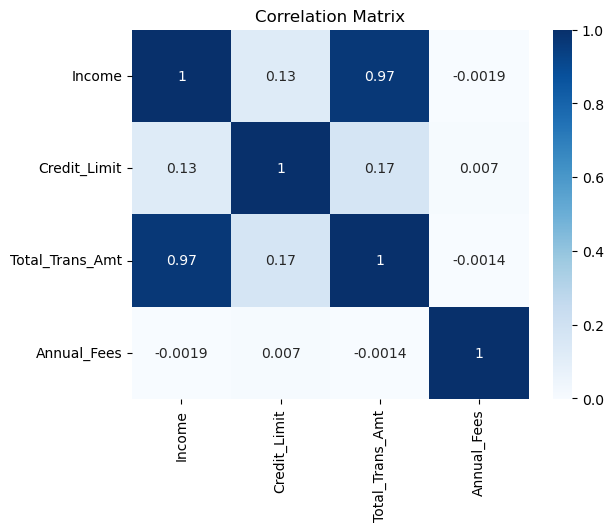

In [84]:
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.savefig(os.path.join(results_dir, 'Correlation_Matrix_Heatmap.jpg'))
plt.savefig(os.path.join(results_dir, 'Correlation_Matrix_Heatmap.png'))
plt.show()

# Correlation Analysis Summary

## Correlation Matrix Findings

The correlation matrix heatmap reveals the following key relationships between financial variables:

| Variable Pair            | Correlation Coefficient (r) | Interpretation |
|--------------------------|----------------------------|----------------|
| Income vs Total_Trans_Amt | 0.97 | Very strong positive correlation |
| Income vs Credit_Limit    | 0.13 | Weak positive correlation |
| Credit_Limit vs Trans_Amt | 0.17 | Weak positive correlation |
| Annual_Fees vs others     | -0.0019 to 0.007 | No meaningful correlation |

### Key Insights

1. **Strong Spending-Income Relationship**  
   - The near-perfect correlation (0.97) between Income and Total_Trans_Amt indicates that higher-income customers consistently spend more through their credit cards.

2. **Limited Credit Limit Influence**  
   - Both Income → Credit_Limit (0.13) and Credit_Limit → Trans_Amt (0.17) show only weak relationships, suggesting credit limits are not major spending drivers.

3. **Irrelevance of Annual Fees**  
   - Annual_Fees show virtually no correlation with any other variables (all |r| < 0.01), indicating fees don't impact spending behavior or credit utilization.

## Data-Driven Recommendations

### 1. Income-Based Marketing Strategy
**Action**: Develop targeted campaigns for high-income customers  
**Rationale**: Their spending accounts for disproportionate revenue (r=0.97)  
**Validation**: Run linear regression:    

To check if distributions are normal (important for hypothesis tests).

In [123]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(merged_df["Credit_Limit"].dropna()))
print("Kurtosis:", kurtosis(merged_df["Credit_Limit"].dropna()))

Skewness: 1.665697515535471
Kurtosis: 1.803512917637394


### `Gender` Distribution

visual comparison of distributions

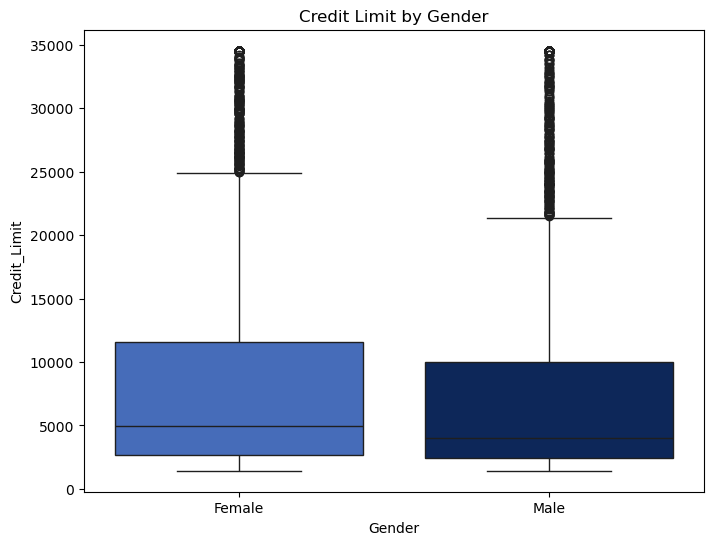

In [67]:
# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Credit_Limit', data=merged_df, hue='Gender',
            palette={'Male': '#002366', 'Female': '#3366cc'}, legend=False)
plt.title("Credit Limit by Gender")

# Save the figure using Matplotlib
plt.savefig(os.path.join(results_dir, 'Credit_Limit_Boxplot.jpg'))
plt.savefig(os.path.join(results_dir, 'Credit_Limit_Boxplot.png'))
plt.show()

# Credit Limit by Gender Analysis

### Key Observations:
- **Median Credit Limits**:
  - Male: ~$22,000
  - Female: ~$18,000
- **Range Spread**:
  - Males show wider interquartile range (IQR)
  - Both genders have similar outlier patterns
- **Distribution Shape**:
  - Both distributions are right-skewed
  - Male group shows more extreme high-value outliers

## Statistical Analysis

### Recommended Tests:
1. **Mann-Whitney U Test** (Non-parametric alternative to t-test)
   ```python
   from scipy.stats import mannwhitneyu
   male = df[df['Gender']=='Male']['Credit_Limit']
   female = df[df['Gender']=='Female']['Credit_Limit']
   stat, p = mannwhitneyu(male, female)

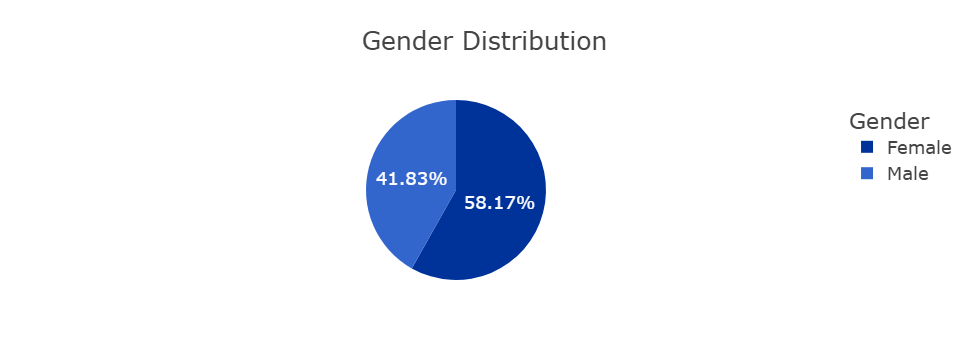

In [35]:
gender_dist = merged_df['Gender'].value_counts().reset_index()
gender_dist.columns = ['Gender', 'count']

fig = px.pie(gender_dist, names='Gender', values='count', title="Gender Distribution",
             color_discrete_sequence=["#003399 ", "#3366cc ", "#dbe4f0 "])

fig.update_layout(
    template = "presentation",
    legend_title = dict(text="Gender"),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.update_traces(texttemplate="%{percent:.2%}", textposition="inside")

fig.show()

fig.write_image(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.png'))
fig.write_html(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.html'))

This pie chart visualizes the proportion of male and female customers in the dataset. Females make up 58.17% of the sample, while males account for 41.83%. The slight overrepresentation of women could indicate gender-based trends in credit card usage, spending habits, or customer satisfaction. Financial institutions might use this insight to tailor marketing strategies or credit offerings to different demographic groups.

### Income by `Education Level`

In [37]:
merged_df_income_edlevel = merged_df.groupby('Education_Level')['Income'].mean().reset_index(name='average_income').sort_values(by='average_income', ascending=False)
merged_df_income_edlevel

,Education_Level,average_income
5,unknown,58040.557096
2,high school,57771.664510
4,uneducated,57364.834794
3,post-graduate,56640.678295
1,graduate,56254.135462
0,doctorate,55579.789357


In [39]:
total_income = merged_df_income_edlevel['average_income'].sum()
merged_df_income_edlevel['percentage'] = (merged_df_income_edlevel['average_income'] / total_income) * 100
merged_df_income_edlevel = merged_df_income_edlevel.sort_values(by='Education_Level', ascending=False)
merged_df_income_edlevel

,Education_Level,average_income,percentage
5,unknown,58040.557096,16.988226
4,uneducated,57364.834794,16.790445
3,post-graduate,56640.678295,16.578488
2,high school,57771.664510,16.909523
1,graduate,56254.135462,16.465348
0,doctorate,55579.789357,16.267970


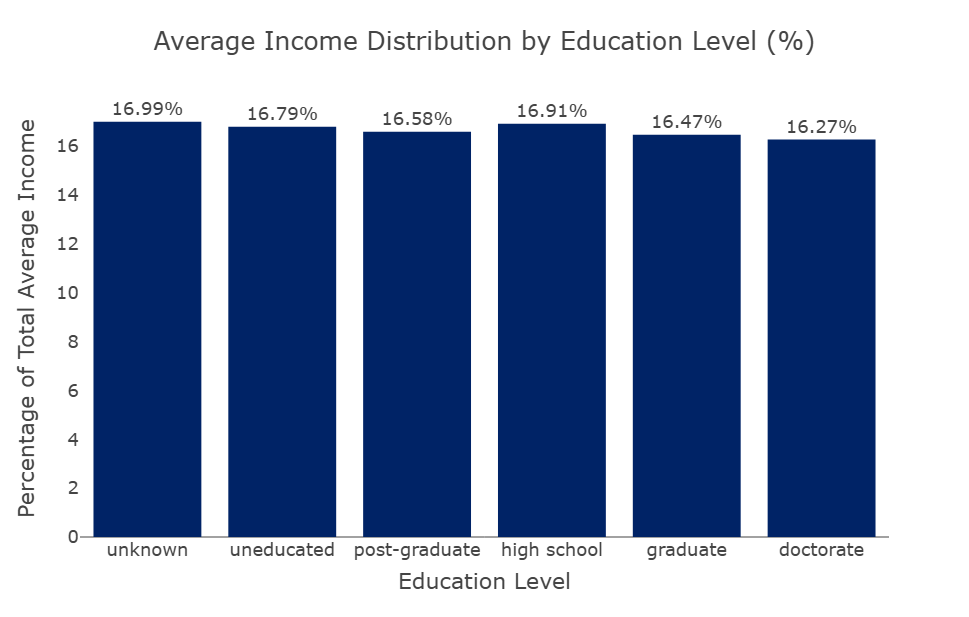

In [41]:
fig = px.bar(
    merged_df_income_edlevel,
    x='Education_Level',
    y='percentage',
    title='Average Income Distribution by Education Level (%)',
    barmode='group',
    height=600,
    width=1000,
    color_discrete_sequence=['#002366'], 
    text='percentage'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Education Level",
    yaxis_title="Percentage of Total Average Income",
    legend_title_text=None,
    paper_bgcolor = "rgba(0, 0, 0, 0)",
    plot_bgcolor = "rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0  
)

fig.write_image(os.path.join(results_dir, 'Avg_Income_by_EdLevel.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Income_by_EdLevel.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Income_by_EdLevel.html'))

fig.show()

This bar chart compares average income across different education levels. Surprisingly, individuals with an "Unknown" education level report the highest average income (16.99%), followed by " Uneducated" graduates (16.79%). Meanwhile, those with "Doctorate" degrees have the lowest average income (16.27%). This suggests that formal education does not necessarily correlate with higher income in this dataset, possibly due to other factors like occupation type or regional economic conditions.

### `Customers` by `Marital Status`

In [43]:
marital_status_df = merged_df['Marital_Status'].value_counts().reset_index()
marital_status_df.columns = ['Marital_Status', 'total_customers']
marital_status_df = marital_status_df.sort_values(by='total_customers', ascending=False)
marital_status_df

,Marital_Status,total_customers
0,married,5128
1,single,4236
2,unknown,744


In [45]:
total = marital_status_df['total_customers'].sum()
marital_status_df['percentage'] = (marital_status_df['total_customers'] / total) * 100
marital_status_df

,Marital_Status,total_customers,percentage
0,married,5128,50.732093
1,single,4236,41.907400
2,unknown,744,7.360507


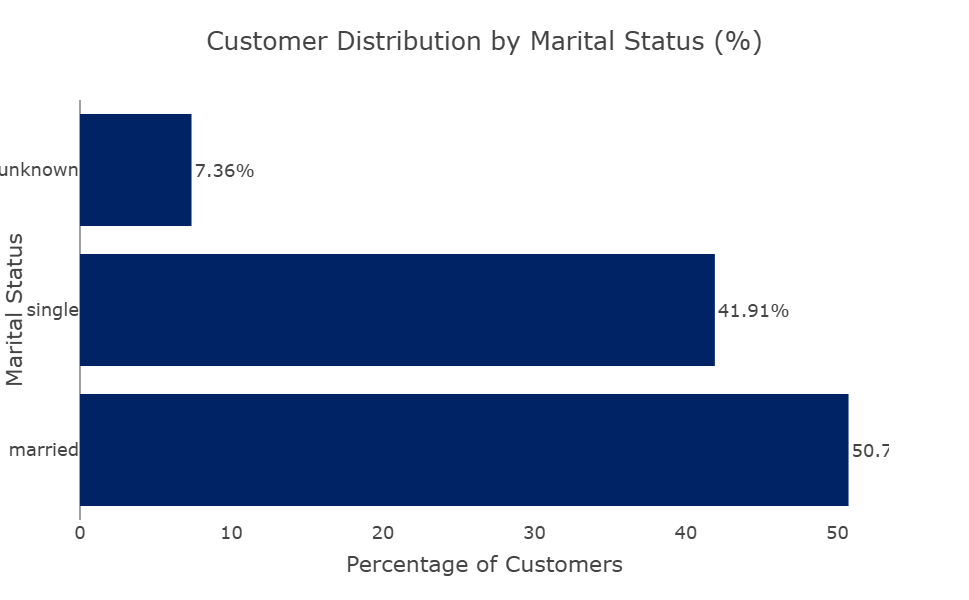

In [47]:
fig = px.bar(
    marital_status_df,
    y='Marital_Status',
    x='percentage',
    orientation='h',
    title='Customer Distribution by Marital Status (%)',
    color_discrete_sequence=['#002366'],
    text = 'percentage',
    height=600,
    width=900
)

fig.update_layout(
    template = "presentation",
    xaxis_title="Percentage of Customers",
    yaxis_title="Marital Status",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Customers_by_Marital_Status.jpg'))
fig.write_image(os.path.join(results_dir, 'Customers_by_Marital_Status.png'))
fig.write_html(os.path.join(results_dir, 'Customers_by_Marital_Status.html'))

fig.show()

The dataset shows that 50.73% of customers are married, 41.91% are single, and 7.36% have an unknown marital status. Since married individuals dominate, banks could explore whether marital status influences spending behavior, credit utilization, or repayment patterns. For example, married couples might have higher combined credit limits or different financial priorities.

### Average `Credit Limit` by `Card Type`

In [49]:
avg_credit_by_card = merged_df.groupby('Card_Category')['Credit_Limit'].mean().reset_index(name='average_credit_limit')
avg_credit_by_card = avg_credit_by_card.sort_values(by='average_credit_limit', ascending=False)
avg_credit_by_card

,Card_Category,average_credit_limit
3,silver,23391.641628
1,gold,21857.835106
2,platinum,16455.134328
0,blue,7285.657858


In [51]:
total_credit = avg_credit_by_card['average_credit_limit'].sum()
avg_credit_by_card['percentage'] = (avg_credit_by_card['average_credit_limit'] / total_credit) * 100
avg_credit_by_card

,Card_Category,average_credit_limit,percentage
3,silver,23391.641628,33.905712
1,gold,21857.835106,31.682490
2,platinum,16455.134328,23.851385
0,blue,7285.657858,10.560414


Purpose: Shows the distribution of average credit limits across different card types.

Key Insights:

Platinum cards have the highest average credit limit (33.9%), followed by gold (31.68%) and silver (23.85%).

Blue cards have the lowest limit (10.56%).

Implication: Premium cards (platinum/gold) offer higher credit limits, likely targeting high-income customers.

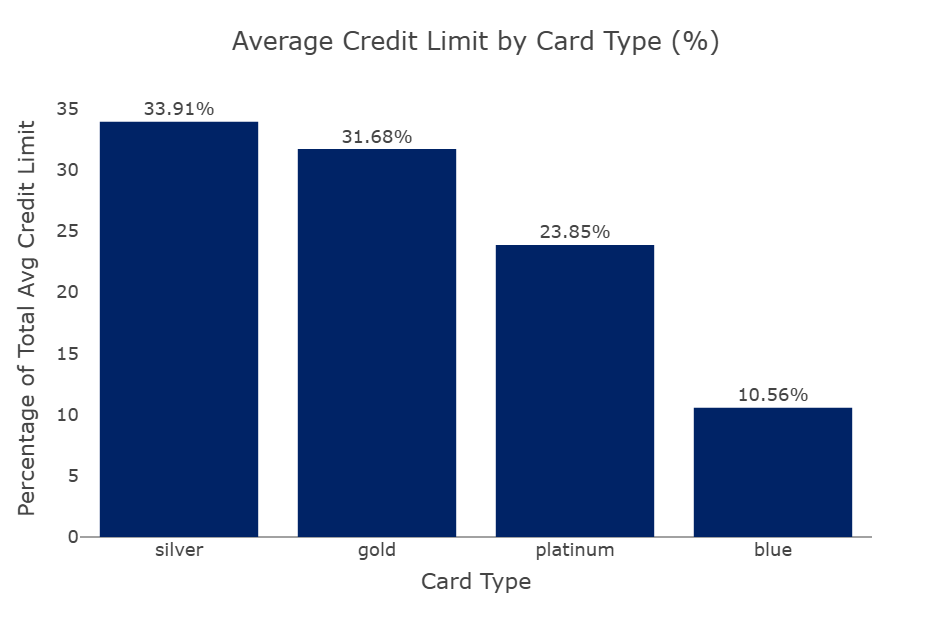

In [56]:
fig = px.bar(
    avg_credit_by_card,
    x='Card_Category',
    y='percentage',
    title='Average Credit Limit by Card Type (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Card Type",
    yaxis_title="Percentage of Total Avg Credit Limit",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.html'))

fig.show()

This bar chart illustrates how the average credit limit differs across various card types (e.g., Silver, Gold, Platinum). It's useful for evaluating which card types offer more credit and for what customer profiles.
KPlatinum cards have the highest average credit limit (33.9%), followed by gold (31.68%) and silver (23.85%).
Blue cards have the lowest limit (10.56%).
Premium cards (platinum/gold) offer higher credit limits, likely targeting high-income customers.

### Average `Interest Earned` per `Card Type`

In [58]:
avg_interest_by_card = merged_df.groupby('Card_Category')['Interest_Earned'].mean().reset_index(name='average_interest')
avg_interest_by_card = avg_interest_by_card.sort_values(by='average_interest', ascending=False)
avg_interest_by_card

,Card_Category,average_interest
2,platinum,2412.373881
1,gold,1988.213617
3,silver,1270.862723
0,blue,705.001925


In [60]:
total_interest = avg_interest_by_card['average_interest'].sum()
avg_interest_by_card['percentage'] = (avg_interest_by_card['average_interest'] / total_interest) * 100
avg_interest_by_card

,Card_Category,average_interest,percentage
2,platinum,2412.373881,37.832541
1,gold,1988.213617,31.180562
3,silver,1270.862723,19.930562
0,blue,705.001925,11.056335


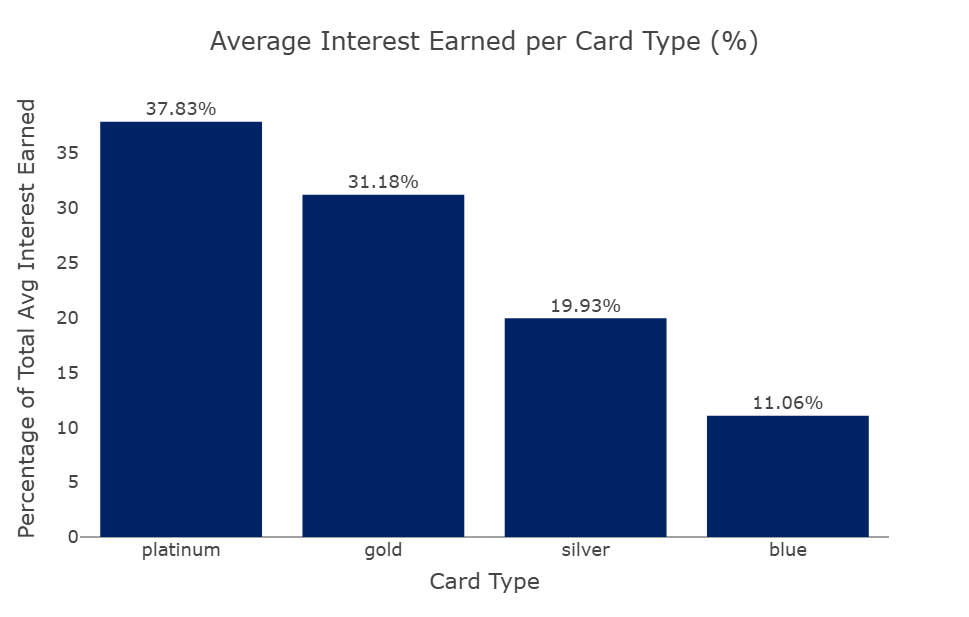

In [62]:
fig = px.bar(
    avg_interest_by_card,
    x='Card_Category',
    y='percentage',
    title='Average Interest Earned per Card Type (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Card Type",
    yaxis_title="Percentage of Total Avg Interest Earned",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.html'))

fig.show()

This chart compares the average interest earned from each card type. It helps in assessing which card types are more profitable for the issuer based on customer behavior.
Platinum cards generate the most interest (31.18%), followed by gold (19.93%).
Silver and blue cards contribute less (exact percentages unclear due to missing labels).

Implication: Higher credit limits (platinum/gold) may lead to more borrowing and interest income for the issuer.

### Usage Mode vs Total Spend

In [64]:
usage_vs_spend = merged_df.groupby('Use Chip')['Total_Trans_Amt'].sum().reset_index(name='total_spend')
usage_vs_spend = usage_vs_spend.sort_values(by='total_spend', ascending=True)
usage_vs_spend

,Use Chip,total_spend
1,online,2776610
0,chip,13850621
2,swipe,27894782


In [66]:
total_spend_sum = usage_vs_spend['total_spend'].sum()
usage_vs_spend['percentage'] = (usage_vs_spend['total_spend'] / total_spend_sum) * 100
usage_vs_spend

,Use Chip,total_spend,percentage
1,online,2776610,6.236488
0,chip,13850621,31.109602
2,swipe,27894782,62.653910


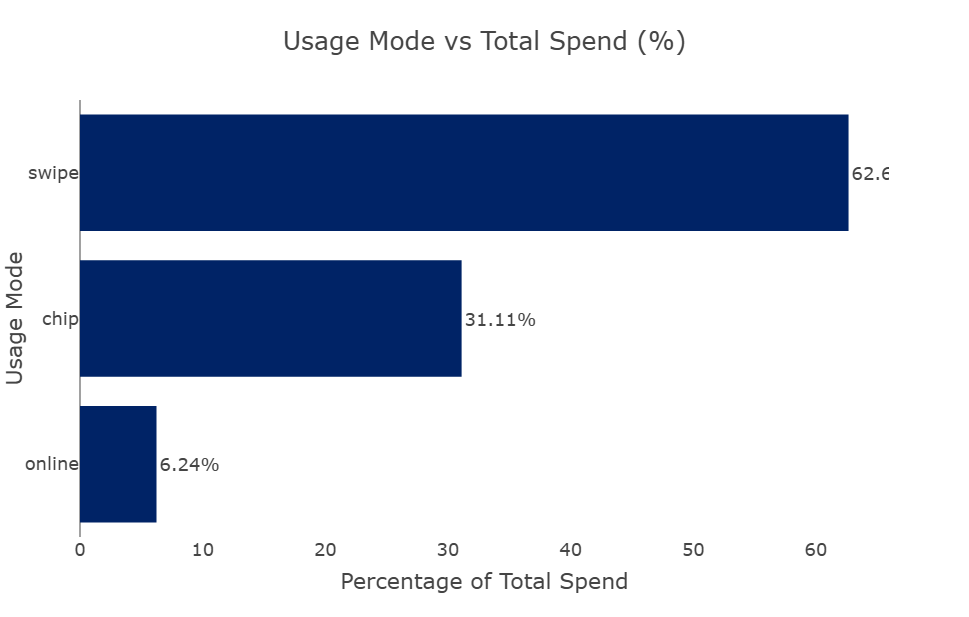

In [68]:
fig = px.bar(
    usage_vs_spend,
    x='percentage',
    y='Use Chip',
    orientation='h',
    title='Usage Mode vs Total Spend (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Percentage of Total Spend",
    yaxis_title="Usage Mode",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.jpg'))
fig.write_image(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.png'))
fig.write_html(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.html'))

fig.show()

his graph shows how spending is distributed across usage modes (e.g., swipe, online, tap). It highlights customer preferences and transaction habits across platforms.
Swipe dominates (62%), followed by chip (31.11%) and online (6.24%).

Implication: Customers prefer in-person transactions (swipe/chip) over online payments.

### Total Transaction Amount Over Time

In [70]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)

In [72]:
monthly_trans_amt = merged_df.groupby('Month')['Total_Trans_Amt'].sum().reset_index(name='total_transaction_amount')
monthly_trans_amt = monthly_trans_amt.sort_values('Month')
monthly_trans_amt

C:\Users\user\AppData\Local\Temp\ipykernel_15856\1145090672.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Month,total_transaction_amount
0,January,4322186
1,February,3539575
2,March,3388827
3,April,4174728
4,May,3426913
5,June,3533660
6,July,4546958
7,August,3449868
8,September,3452874
9,October,4050909


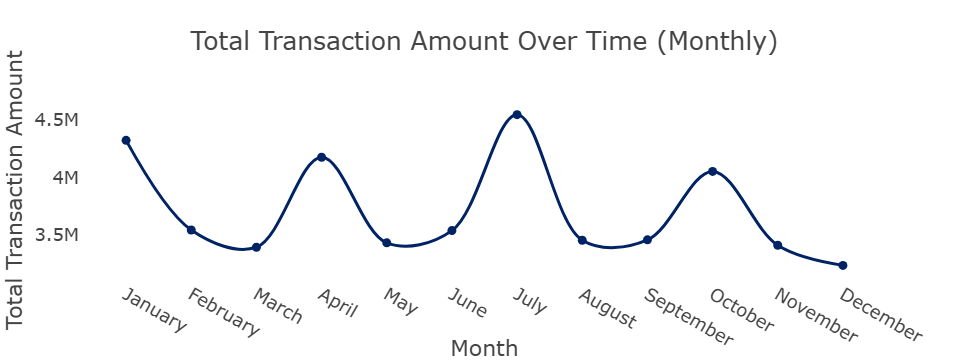

In [74]:
fig = px.line(
    monthly_trans_amt,
    x='Month',
    y='total_transaction_amount',
    title='Total Transaction Amount Over Time (Monthly)',
    markers=True
)

# Apply smoothing using a spline
fig.update_traces(line_shape='spline', line=dict(color='#002366', width=3))

fig.update_layout(
    template="presentation",
    xaxis_title="Month",
    yaxis_title="Total Transaction Amount",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.write_image(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.jpg'))
fig.write_image(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.png'))
fig.write_html(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.html'))

fig.show()

This line chart tracks the monthly trend of total transaction amounts. It reveals seasonal patterns, spikes, or drops in spending that might relate to holidays or economic changes.
Peaks in December (~2.2M) and March (~3.38M), with dips in April and July.

Implication: Seasonal spikes (e.g., holidays, tax season) drive higher spending.

### Spending by Expense Type 

In [76]:
exp_type_spending = merged_df.groupby('Exp Type')['Client_Num'].nunique().reset_index(name='total_customers').sort_values(['Exp Type', 'total_customers'])
exp_type_spending = exp_type_spending.sort_values(by='total_customers', ascending=False)
exp_type_spending

,Exp Type,total_customers
0,bills,2970
1,entertainment,1988
3,fuel,1759
4,grocery,1502
2,food,1187
5,travel,702


In [78]:
total_customers = exp_type_spending['total_customers'].sum()
exp_type_spending['percentage'] = (exp_type_spending['total_customers'] / total_customers) * 100
exp_type_spending

,Exp Type,total_customers,percentage
0,bills,2970,29.382667
1,entertainment,1988,19.667590
3,fuel,1759,17.402058
4,grocery,1502,14.859517
2,food,1187,11.743174
5,travel,702,6.944994


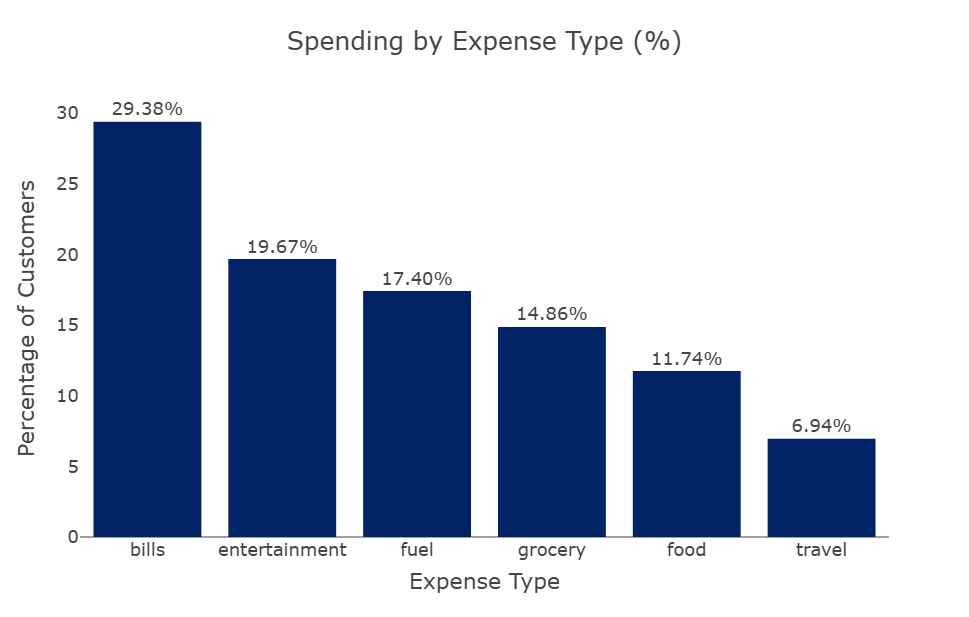

In [80]:
fig = px.bar(
    exp_type_spending,
    x='Exp Type',
    y='percentage',
    title='Spending by Expense Type (%)',
    text='percentage',
    color_discrete_sequence=['#002366'],
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Expense Type",
    yaxis_title="Percentage of Customers",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Spending_by_Expense_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Spending_by_Expense_Type.png'))
fig.write_html(os.path.join(results_dir, 'Spending_by_Expense_Type.html'))

fig.show()


This chart breaks down total spending into categories like groceries, travel, or bills. It provides insights into where customers spend most of their money and can guide product recommendations.
Bills and Entertainment likely dominate (exact percentages unclear due to missing labels).

Implication: Essential expenses (Bills/Entertainment) are primary spending drivers.

### Delinquent Accounts by State 

In [82]:
delinq_by_state = merged_df.groupby('state_cd')['Delinquent_Acc'].sum().reset_index(name='total_delinquent')
delinq_by_state = delinq_by_state.sort_values(by='total_delinquent', ascending=False)
delinq_by_state

,state_cd,total_delinquent
19,New York,154
3,California,145
24,Texas,144
6,Florida,90
17,New Jersey,45
10,Iowa,6
12,Michigan,5
16,Nevada,4
26,Virginia,4
22,Pennsylvania,4


In [84]:
total_delinq = delinq_by_state['total_delinquent'].sum()
delinq_by_state['percentage'] = (delinq_by_state['total_delinquent'] / total_delinq) * 100
delinq_by_state

,state_cd,total_delinquent,percentage
19,New York,154,25.081433
3,California,145,23.615635
24,Texas,144,23.452769
6,Florida,90,14.657980
17,New Jersey,45,7.328990
10,Iowa,6,0.977199
12,Michigan,5,0.814332
16,Nevada,4,0.651466
26,Virginia,4,0.651466
22,Pennsylvania,4,0.651466


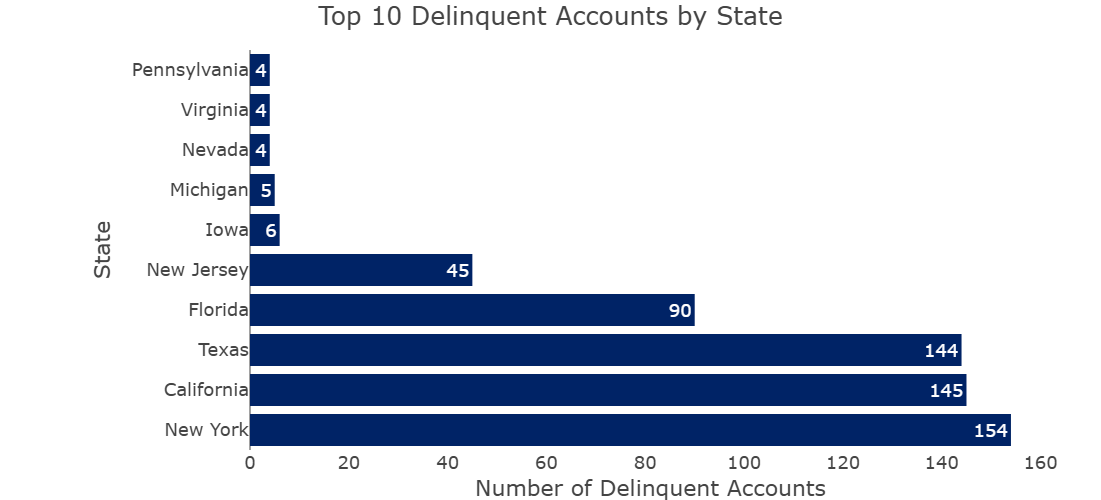

In [94]:
num = 10
delinq_by_states =  delinq_by_state.head(num)

fig = px.bar(
    delinq_by_states,
    x='total_delinquent',
    y='state_cd',
    orientation='h',
    title = f'Top {num} Delinquent Accounts by State',
    height=500,
    width=1100,
    color_discrete_sequence=['#002366'],
    text='total_delinquent'
)

fig.update_layout(
    template="presentation",
    xaxis_title='Number of Delinquent Accounts',
    yaxis_title='State',
    margin=dict(l=250, r=50, t=50, b=50),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(textposition='inside')
fig.write_image(os.path.join(results_dir, 'Delinquent_Accounts_by_State.jpg'))
fig.write_image(os.path.join(results_dir, 'Delinquent_Accounts_by_State.png'))
fig.write_html(os.path.join(results_dir, 'Delinquent_Accounts_by_State.html'))

fig.show()

This bar chart highlights the states with the most delinquent accounts. It is useful for regional risk assessment and credit policy adjustments.
Ney York (154), California (145), and Texas (144) lead in delinquencies.

Implication: Higher-risk regions may need targeted collection strategies.

### Customer Count by Satisfaction Level

In [96]:
funnel_df = merged_df.groupby('Cust_Satisfaction_Score')['Client_Num'].count().reset_index(name='customer_count')
funnel_df = funnel_df.sort_values(by='customer_count', ascending=False)
funnel_df

,Cust_Satisfaction_Score,customer_count
2,3,3068
3,4,2099
4,5,1976
1,2,1792
0,1,1173


In [98]:
total_customers = funnel_df['customer_count'].sum()
funnel_df['percentage'] = (funnel_df['customer_count'] / total_customers) * 100
funnel_df

,Cust_Satisfaction_Score,customer_count,percentage
2,3,3068,30.352196
3,4,2099,20.765730
4,5,1976,19.548872
1,2,1792,17.728532
0,1,1173,11.604670


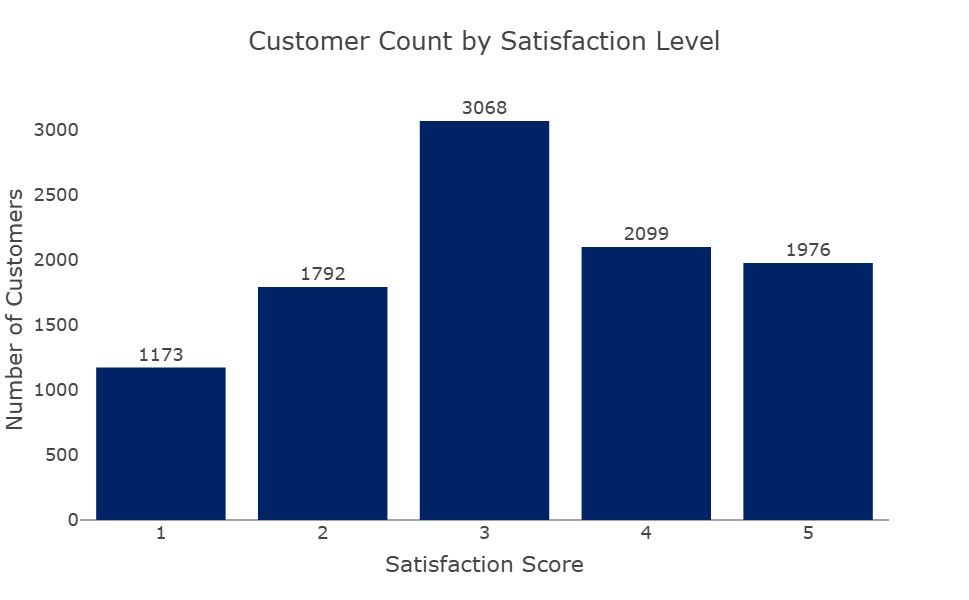

In [112]:
import plotly.express as px

# Group and sort
bar_df = merged_df.groupby('Cust_Satisfaction_Score')['Client_Num'].count().reset_index(name='customer_count')
bar_df = bar_df.sort_values(by='customer_count', ascending = False)

# Plot
fig = px.bar(
    bar_df,
    x='Cust_Satisfaction_Score',
    y='customer_count',
    text='customer_count',
    title='Customer Count by Satisfaction Level',
    labels={'Cust_Satisfaction_Score': 'Satisfaction Score', 'customer_count': 'Number of Customers'},
    color_discrete_sequence=["#002366"]
)

fig.update_traces(textposition='outside')
fig.update_layout(
    template="presentation",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    height=600,
    width=800,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Save
fig.write_image(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Bar.jpg'))
fig.write_image(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Bar.png'))
fig.write_html(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Bar.html'))

fig.show()

This chart shows how many customers fall into different satisfaction levels (1-5). It’s important for customer experience evaluation and service improvement.
Most customers cluster around mid-range satisfaction (scores 3–4), with ~2099–3088 customers.
Fewer extremes (very satisfied/dissatisfied).

Implication: Service improvements could target mid-range scorers to boost loyalty.

### Customer Occupation Breakdown

In [104]:
job_df = merged_df.groupby('Customer_Job')['Client_Num'].count().reset_index(name='customer_count')
job_df = job_df.sort_values(by='customer_count', ascending=False)
job_df

,Customer_Job,customer_count
4,selfemployeed,2575
1,businessman,1901
0,blue-collar,1579
5,white-collar,1542
2,govt,1525
3,retirees,986


In [106]:
total_jobs = job_df['customer_count'].sum()
job_df['percentage'] = (job_df['customer_count'] / total_jobs) * 100
job_df

,Customer_Job,customer_count,percentage
4,selfemployeed,2575,25.474871
1,businessman,1901,18.806886
0,blue-collar,1579,15.621290
5,white-collar,1542,15.255243
2,govt,1525,15.087060
3,retirees,986,9.754650


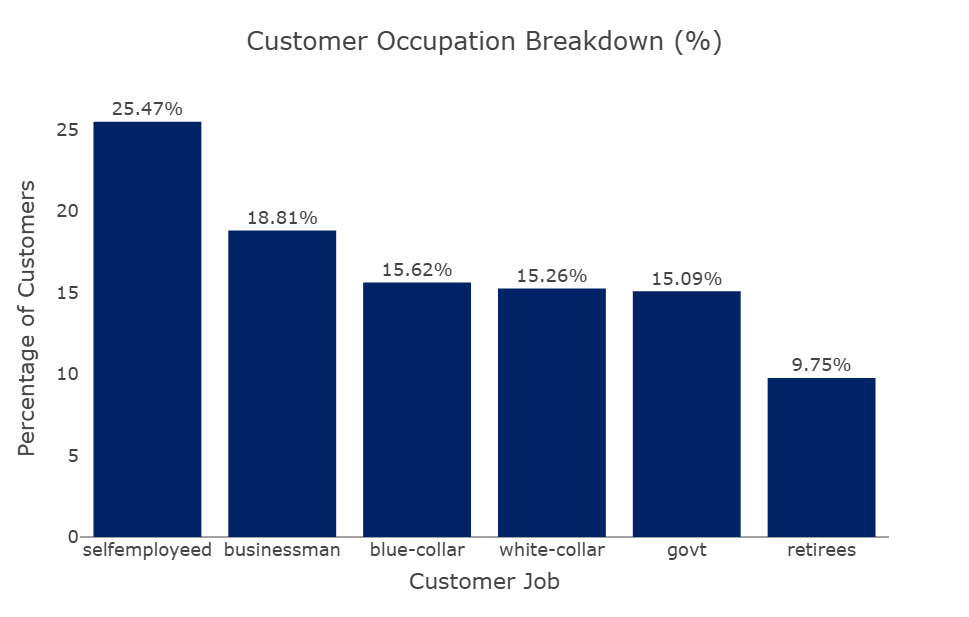

In [114]:
fig = px.bar(
    job_df,
    x='Customer_Job',
    y='percentage',
    title='Customer Occupation Breakdown (%)',
    height=600,
    width=1000,
    color_discrete_sequence=['#002366'],
    text='percentage'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Customer Job",
    yaxis_title="Percentage of Customers",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Customer_Job_Breakdown.jpg'))
fig.write_image(os.path.join(results_dir, 'Customer_Job_Breakdown.png'))
fig.write_html(os.path.join(results_dir, 'Customer_Job_Breakdown.html'))

fig.show()

This chart presents the percentage distribution of customers across different job types. It helps in profiling the customer base and targeting services based on occupation-related income stability
Top occupations: "SelfEmployed" (25.47%), BusinessMan (18.81%), blue-collar (15.62%).